In [1]:
from top2vec import Top2Vec
import pandas as pd
from os.path import expanduser
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json(expanduser('~/data/arxiv_snapshot/arxiv-metadata-oai-snapshot-subset.json'), lines=True)

In [3]:
# No Nulls
df[['id', 'title', 'abstract', 'categories']].isna().sum()

id            0
title         0
abstract      0
categories    0
dtype: int64

In [57]:
df.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,title_abstract
0,0704.1007,Yong Chen,Pan Zhang and Yong Chen,Transient Dynamics of Sparsely Connected Hopfield Neural Networks with\n Arbitrary Degree Distributions,"11 pages, 5 figures. Any comments are favored","Physica A 387, 1009(2008)",10.1016/j.physa.2007.09.047,None,cond-mat.dis-nn cond-mat.stat-mech,None,"Using probabilistic approach, the transient dynamics of sparsely connected\nHopfield neural networks is studied for arbitrary degree distributions. A\nrecursive scheme is developed to determine the time evolution of overlap\nparameters. As illustrative examples, the explicit calculations of dynamics for\nnetworks with binomial, power-law, and uniform degree distribution are\nperformed. The results are good agreement with the extensive numerical\nsimulations. It indicates that with the same average degree, there is a gradual\nimprovement of network performance with increasing sharpness of its degree\ndistribution, and the most efficient degree distribution for global storage of\npatterns is the delta function.\n","[{'version': 'v1', 'created': 'Sun, 8 Apr 2007 02:10:58 GMT'}, {'version': 'v2', 'created': 'Fri, 7 Dec 2007 07:14:19 GMT'}]",2011-11-09,"[[Zhang, Pan, ], [Chen, Yong, ]]","Transient Dynamics of Sparsely Connected Hopfield Neural Networks with\n Arbitrary Degree Distributions Using probabilistic approach, the transient dynamics of sparsely connected\nHopfield neural networks is studied for arbitrary degree distributions. A\nrecursive scheme is developed to determine the time evolution of overlap\nparameters. As illustrative examples, the explicit calculations of dynamics for\nnetworks with binomial, power-law, and uniform degree distribution are\nperformed. The results are good agreement with the extensive numerical\nsimulations. It indicates that with the same average degree, there is a gradual\nimprovement of network performance with increasing sharpness of its degree\ndistribution, and the most efficient degree distribution for global storage of\npatterns is the delta function.\n"
1,0704.3775,Yu Zhiyong,"Zhen Wu, Zhiyong Yu",Dynamic programming principle for one kind of stochastic recursive\n optimal control problem and Hamilton-Jacobi-Bellman equations,31 pages,None,None,None,math.OC math.PR,None,"In this paper, we study one kind of stochastic recursive optimal control\nproblem with the obstacle constraints for the cost function where the cost\nfunction is described by the solution of one reflected backward stochastic\ndifferential equations. We will give the dynamic programming principle for this\nkind of optimal control problem and show that the value function is the unique\nviscosity solution of the obstacle problem for the corresponding\nHamilton-Jacobi-Bellman equations.\n","[{'version': 'v1', 'created': 'Sat, 28 Apr 2007 03:52:16 GMT'}]",2007-05-23,"[[Wu, Zhen, ], [Yu, Zhiyong, ]]","Dynamic programming principle for one kind of stochastic recursive\n optimal control problem and Hamilton-Jacobi-Bellman equations In this paper, we study one kind of stochastic recursive optimal control\nproblem with the obstacle constraints for the cost function where the cost\nfunction is described by the solution of one reflected backward stochastic\ndifferential equations. We will give the dynamic programming principle for this\nkind of optimal control problem and show that the value function is the unique\nviscosity solution of the obstacle problem for the corresponding\nHamilton-Jacobi-Bellman equations.\n"
2,0705.0078,Claudius Gros,Claudius Gros,Neural networks with transient state dynamics,None,"New J.Phys.9:109,2007",10.1088/1367-2630/9/4/109,None,cond-mat.dis-nn astro-ph cond-mat.other nlin.AO q-bio.NC,None,"We investigate dynamical systems characterized by a time series of distinct\nsemi-stable activity patterns, as they are observed in cortical neural activity\npatterns. We propose a

In [4]:
# No Duplicates
df[['id', 'title', 'abstract']].duplicated().sum()

0

In [5]:
# concatenate title and abstract
df['title_abstract'] = df['title'] + ' ' + df['abstract']

In [6]:
df['title_abstract'].head()

0    Transient Dynamics of Sparsely Connected Hopfi...
1    Dynamic programming principle for one kind of ...
2    Neural networks with transient state dynamics ...
3    Risk Assessment Algorithms Based On Recursive ...
4    Artificial Neural Networks and Support Vector ...
Name: title_abstract, dtype: object

In [7]:
docs = df['title_abstract'].tolist()
doc_ids= df['id'].tolist()

In [8]:
len(docs), len(doc_ids)

(50318, 50318)

In [9]:
docs[0]

'Transient Dynamics of Sparsely Connected Hopfield Neural Networks with\n  Arbitrary Degree Distributions   Using probabilistic approach, the transient dynamics of sparsely connected\nHopfield neural networks is studied for arbitrary degree distributions. A\nrecursive scheme is developed to determine the time evolution of overlap\nparameters. As illustrative examples, the explicit calculations of dynamics for\nnetworks with binomial, power-law, and uniform degree distribution are\nperformed. The results are good agreement with the extensive numerical\nsimulations. It indicates that with the same average degree, there is a gradual\nimprovement of network performance with increasing sharpness of its degree\ndistribution, and the most efficient degree distribution for global storage of\npatterns is the delta function.\n'

In [10]:
type(docs[0]), type(doc_ids[0]), type(doc_ids), type(docs)

(str, str, list, list)

In [26]:
# use `test-learn` for example testing
model = Top2Vec(documents=docs, document_ids=doc_ids, speed='fast-learn', workers=8, embedding_model='doc2vec')

2024-06-03 20:01:08,968 - top2vec - INFO - Pre-processing documents for training
2024-06-03 20:01:18,097 - top2vec - INFO - Creating joint document/word embedding
2024-06-03 20:05:18,558 - top2vec - INFO - Creating lower dimension embedding of documents
2024-06-03 20:05:27,459 - top2vec - INFO - Finding dense areas of documents
2024-06-03 20:05:28,719 - top2vec - INFO - Finding topics


In [48]:
model.save('saved_models/top2vec/top2vec_V1')

In [29]:
model.get_num_topics()

218

In [30]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [31]:
print('min, max, avg:')
min(topic_sizes), max(topic_sizes), sum(topic_sizes)/len(topic_sizes)

min, max, avg:


(24, 1488, 230.8165137614679)

In [ ]:
print(topic_sizes, topic_nums)

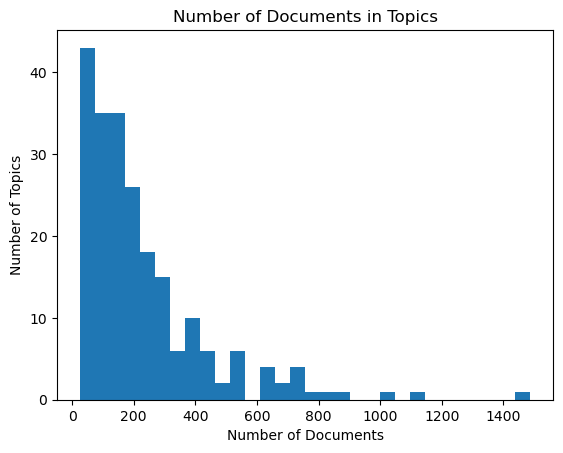

In [32]:

plt.hist(topic_sizes, bins=30)
plt.xlabel('Number of Documents')
plt.ylabel('Number of Topics')
plt.title('Number of Documents in Topics')
plt.show();

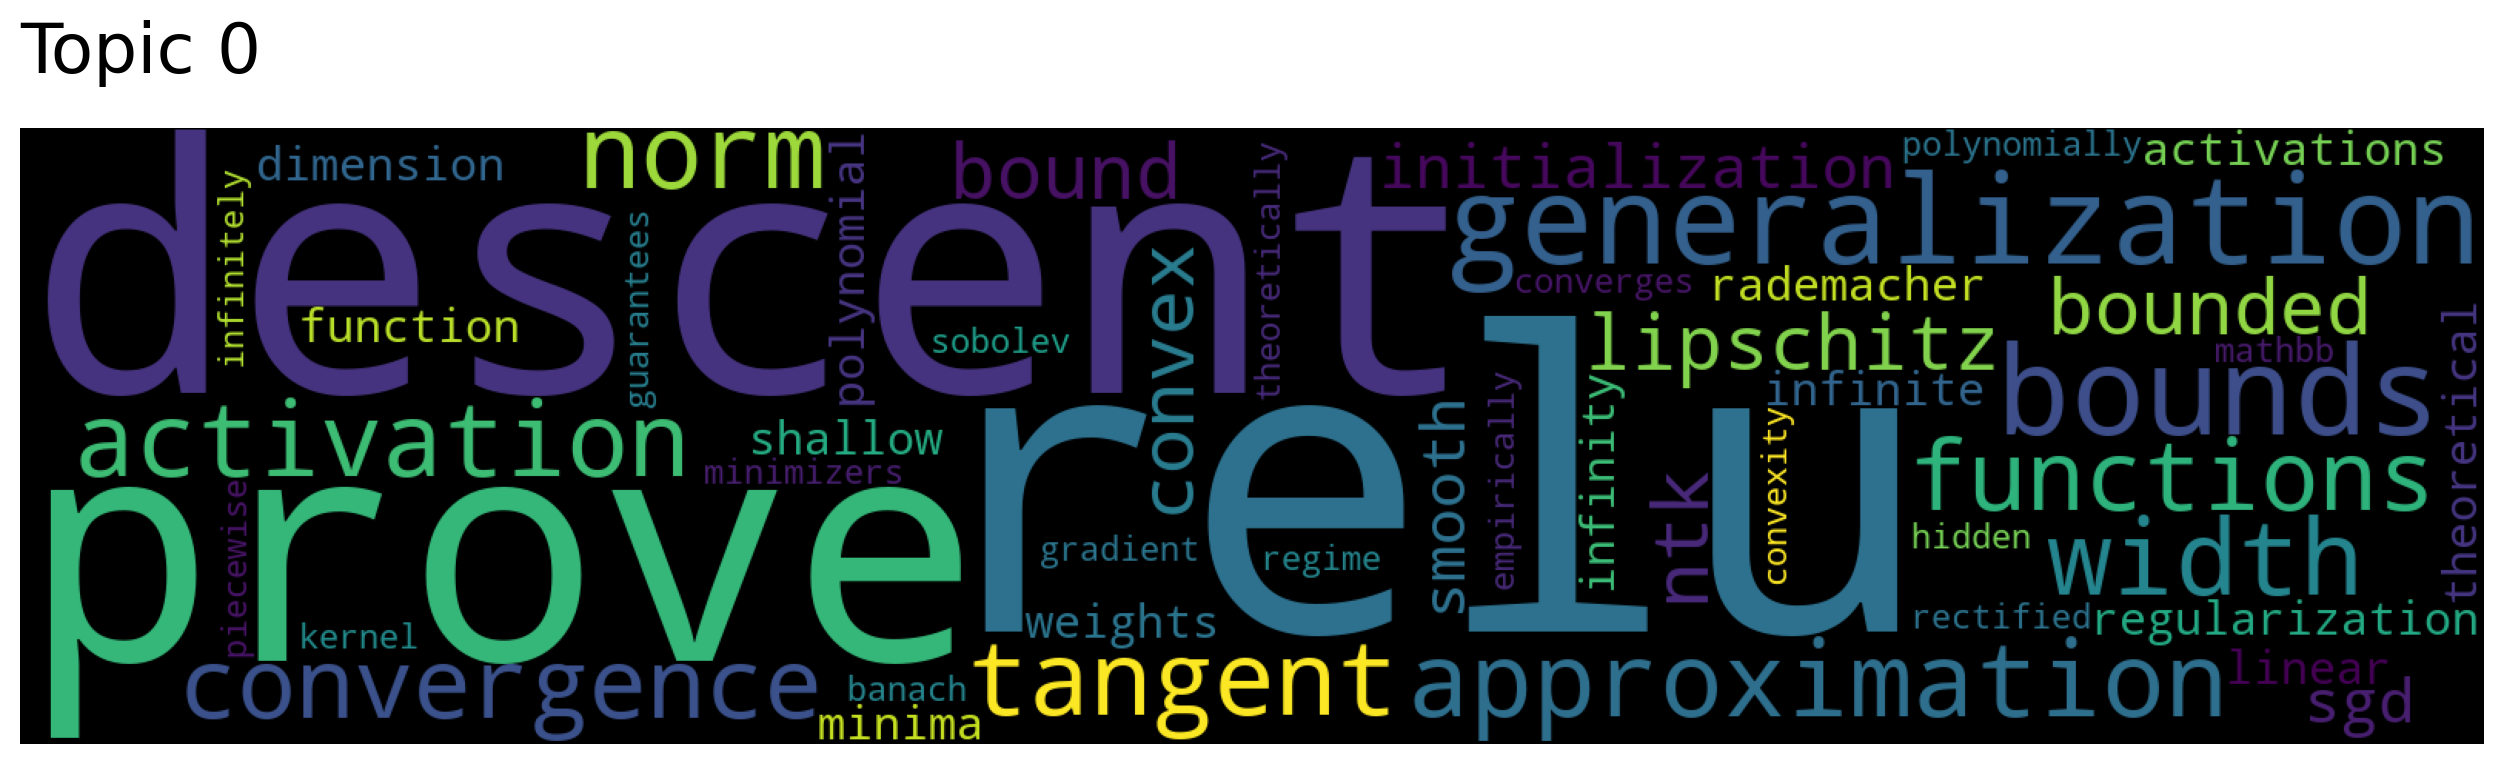

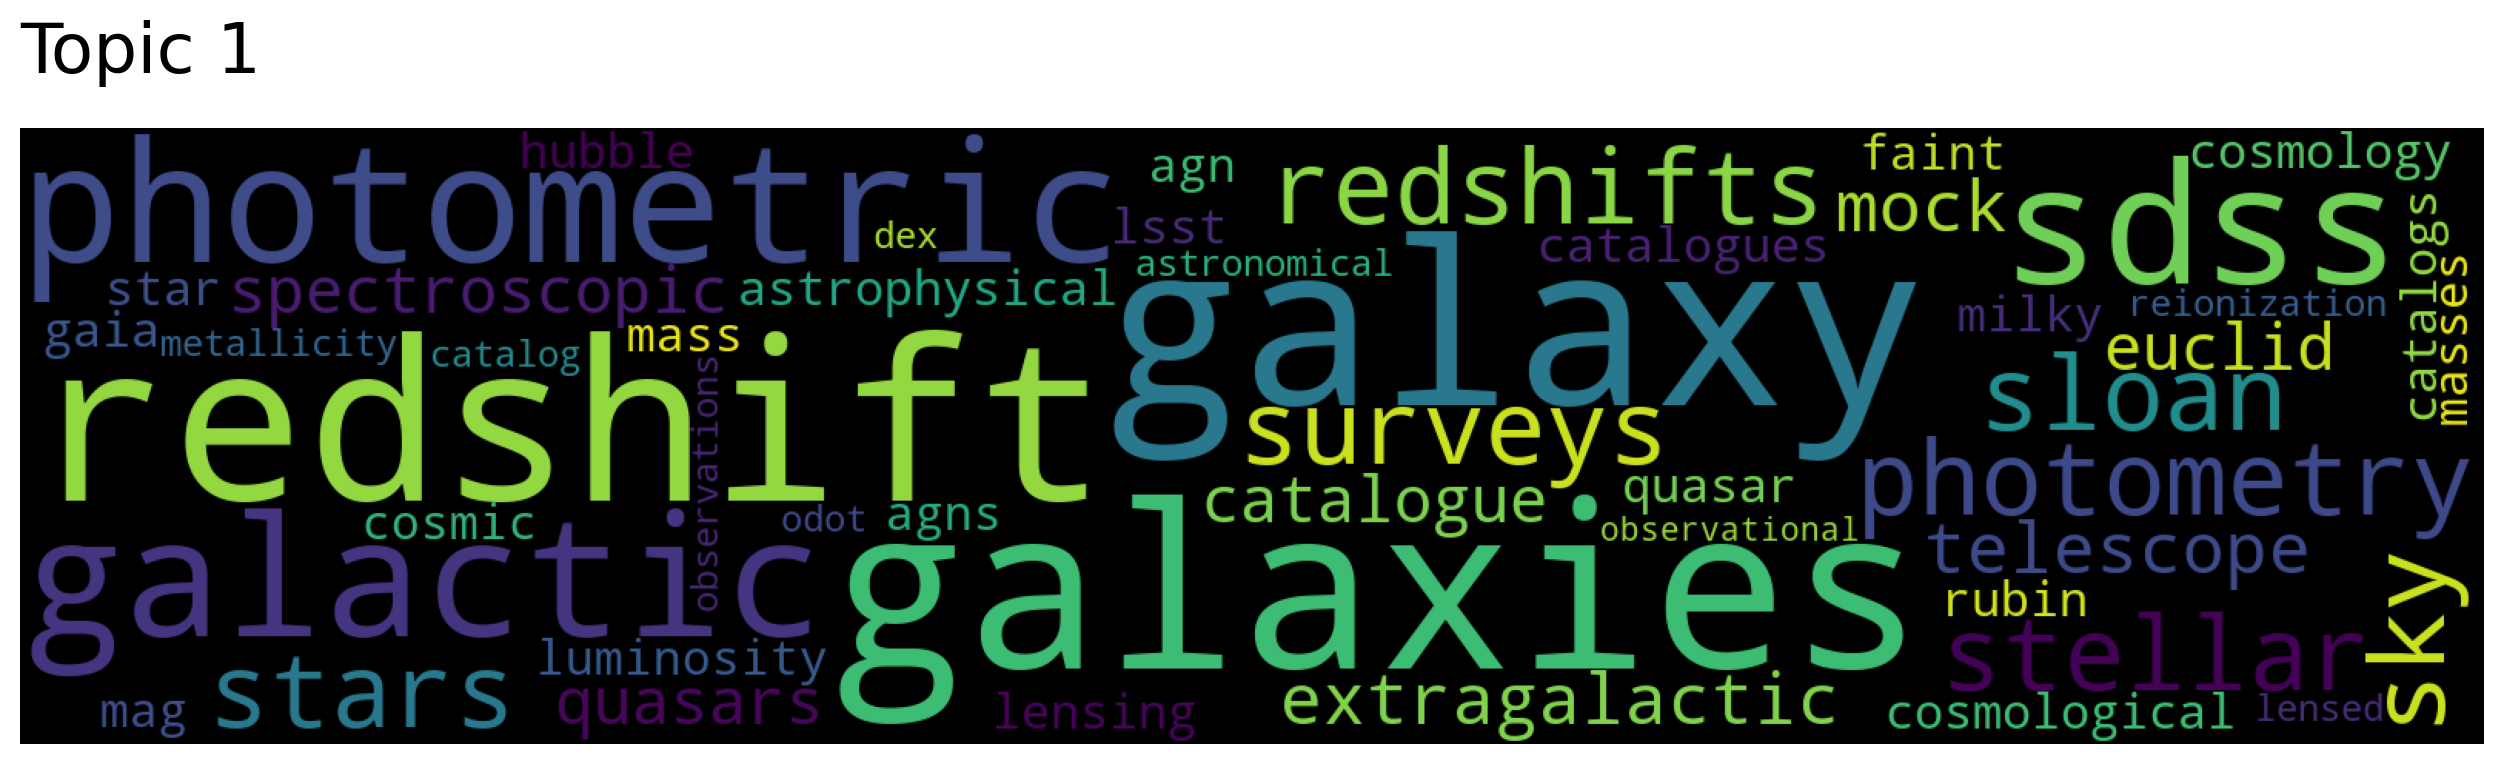

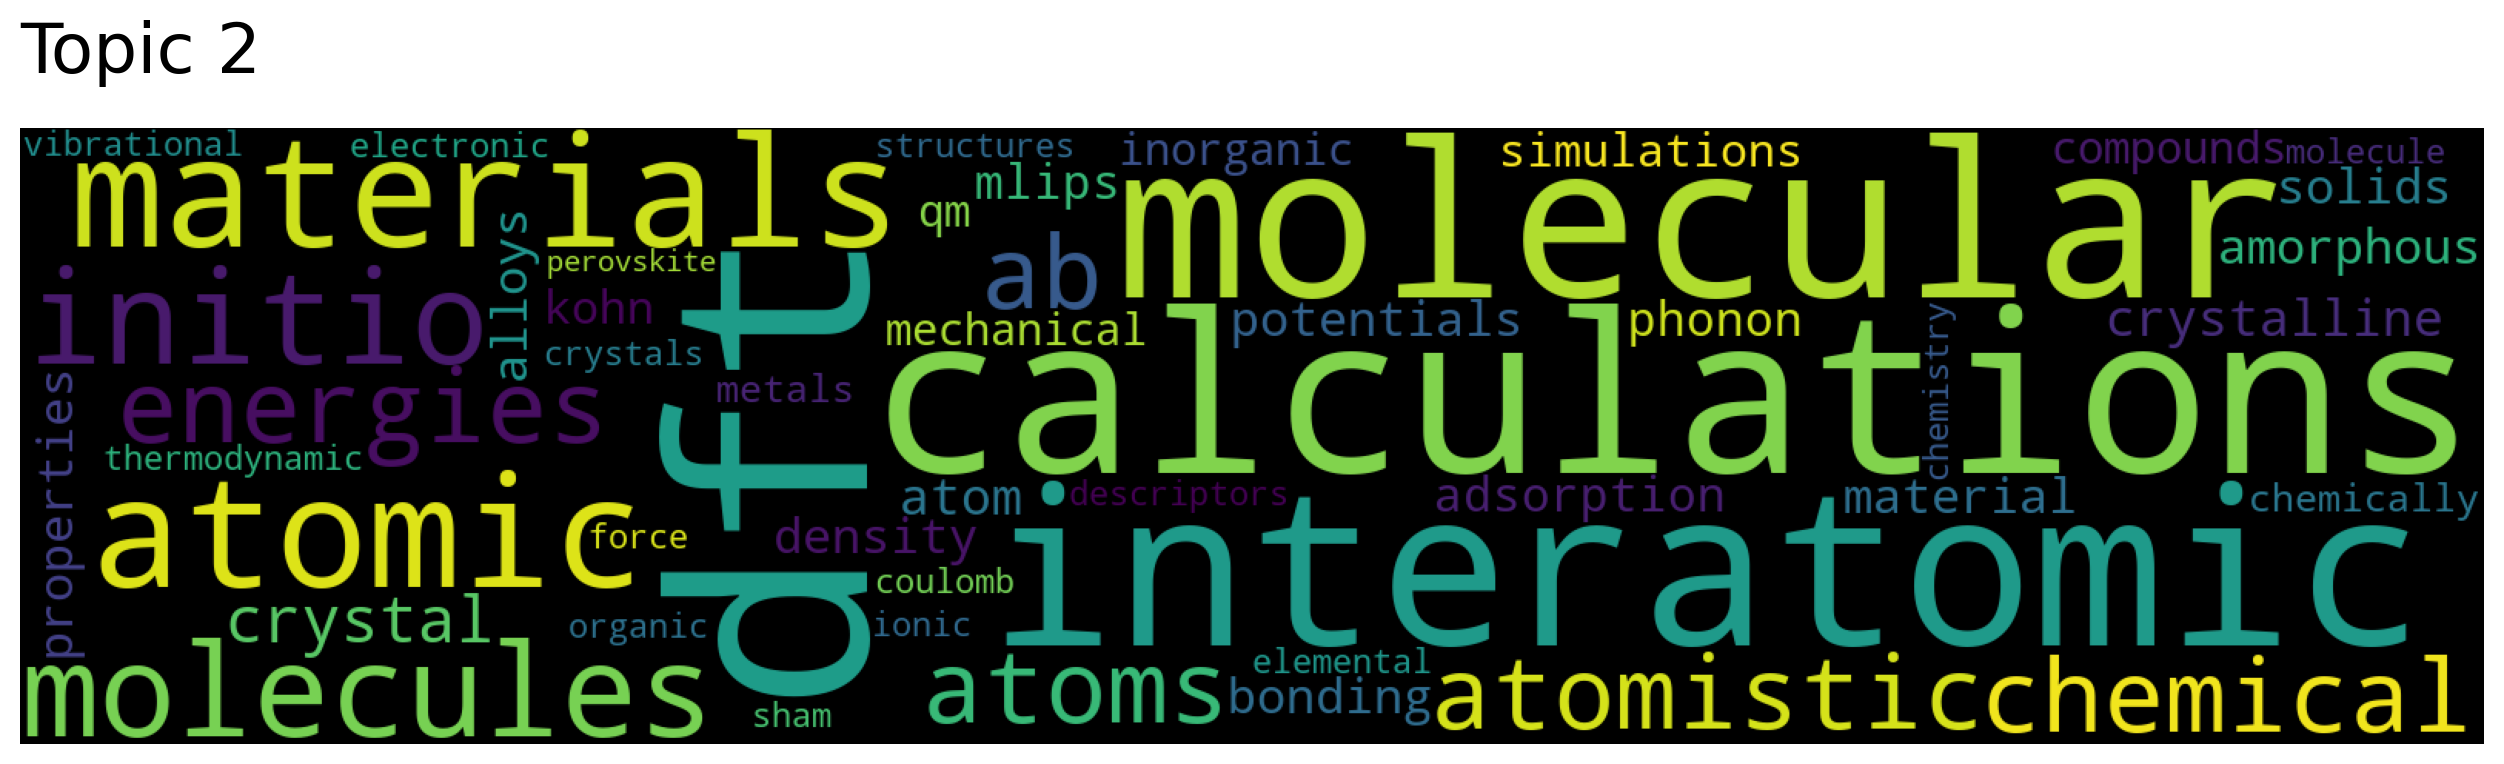

In [33]:
# word clouds for topics for high number of documents
topic_words, word_scores, topic_nums = model.get_topics(num_topics=3)

for topic_num in topic_nums:
    wordcloud = model.generate_topic_wordcloud(topic_num)

In [37]:
# get topic vectors
model.topic_vectors[0]

array([-0.03506558,  0.00523968, -0.01446765, -0.05449107,  0.04866979,
        0.01640192, -0.10212275, -0.01986499,  0.00325562, -0.01468571,
        0.0407648 ,  0.01673097, -0.02714804,  0.02658266, -0.01813101,
        0.02902552, -0.04166454,  0.05135588, -0.04269763, -0.0399232 ,
        0.00980785, -0.00267836, -0.02155172,  0.01666165,  0.03563226,
        0.04373541,  0.04875781,  0.0086524 , -0.08030201, -0.00314442,
       -0.02180115,  0.01240951, -0.06693006,  0.03946781, -0.04961881,
       -0.03329239, -0.01106781, -0.02423783, -0.01423499,  0.04946106,
       -0.01993212,  0.04130881,  0.01552457, -0.00224912, -0.04259508,
       -0.12556069,  0.00607614,  0.03203412, -0.03303877,  0.04599945,
       -0.08909275, -0.04207965,  0.03882325, -0.07022504,  0.04972158,
       -0.03906176,  0.03405548, -0.01965618,  0.04235396, -0.04540871,
       -0.00529867,  0.06489515,  0.04515615,  0.01229725,  0.00026855,
       -0.07206917, -0.00607855,  0.05155066,  0.01421861,  0.03

In [43]:
# sanity check
len(model.document_vectors), len(model.topic_vectors), len(model.doc_top), len(model.doc_dist)

(50318, 218, 50318, 50318)

In [44]:
dir(model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_assign_documents_to_topic',
 '_calculate_documents_topic',
 '_calculate_topic_sizes',
 '_check_document_index_status',
 '_check_hnswlib_status',
 '_check_import_status',
 '_check_model_status',
 '_check_word_index_status',
 '_create_topic_vectors',
 '_deduplicate_topics',
 '_embed_documents',
 '_embed_query',
 '_find_topic_words_and_scores',
 '_get_combined_vec',
 '_get_document_ids',
 '_get_document_indexes',
 '_l2_normalize',
 '_less_than_zero',
 '_reorder_topics',
 '_search_vectors_by_vector',
 '_unassign_documents_from_topic',
 '_validate_doc_ids',
 '_validate_document_ids_add_doc',
 '_validate_docu

In [46]:
search_documents_by_vector = model.search_documents_by_vector(model.topic_vectors[0], num_docs=3)
search_documents_by_vector

(array(['Spurious Local Minima of Deep ReLU Neural Networks in the Neural Tangent\n  Kernel Regime   In this paper, we theoretically prove that the deep ReLU neural networks do\nnot lie in spurious local minima in the loss landscape under the Neural Tangent\nKernel (NTK) regime, that is, in the gradient descent training dynamics of the\ndeep ReLU neural networks whose parameters are initialized by a normal\ndistribution in the limit as the widths of the hidden layers tend to infinity.\n',
        'Generalization Bounds of Stochastic Gradient Descent for Wide and Deep\n  Neural Networks   We study the training and generalization of deep neural networks (DNNs) in\nthe over-parameterized regime, where the network width (i.e., number of hidden\nnodes per layer) is much larger than the number of training data points. We\nshow that, the expected $0$-$1$ loss of a wide enough ReLU network trained with\nstochastic gradient descent (SGD) and random initialization can be bounded by\nthe training

In [67]:
search_documents_by_document = model.search_documents_by_documents(['0704.1007'], num_docs=3)
print(search_documents_by_document[0][0])

print(search_documents_by_document[0][1])

print(search_documents_by_document[0][2])

Parallel dynamics of fully connected Q-Ising neural networks   Using a probabilistic approach we study the parallel dynamics of fully
connected Q-Ising neural networks for arbitrary Q. A Lyapunov function is shown
to exist at zero temperature. A recursive scheme is set up to determine the
time evolution of the order parameters through the evolution of the
distribution of the local field. As an illustrative example, an explicit
analysis is carried out for the first three time steps. For the case of the Q=3
model these theoretical results are compared with extensive numerical
simulations. Finally, equilibrium fixed-point equations are derived and
compared with the thermodynamic approach based upon the replica-symmetric
mean-field approximation.

Transient dynamics for sequence processing neural networks: effect of
  degree distributions   We derive a analytic evolution equation for overlap parameters including the
effect of degree distribution on the transient dynamics of sequence proces

In [85]:
topic_words, word_scores, topic_nums = model.get_topics(num_topics=10)
for topic_num in topic_nums:
    print(f"Topic #{topic_num} contains words: {topic_words[topic_num]}")
    print()

Topic #0 contains words: ['descent' 'relu' 'prove' 'convex' 'convergence' 'approximation' 'bounds'
 'generalization' 'norm' 'activation' 'gradient' 'regularization' 'sgd'
 'functions' 'width' 'tangent' 'lipschitz' 'ntk' 'theoretical' 'bound'
 'linear' 'converges' 'bounded' 'smooth' 'guarantees' 'weights'
 'initialization' 'infinity' 'minima' 'function' 'rademacher' 'infinite'
 'convexity' 'activations' 'weight' 'theoretically' 'layer' 'converge'
 'stochastic' 'hidden' 'polynomial' 'polynomially' 'minimizers'
 'rectified' 'mathbb' 'banach' 'empirically' 'piecewise' 'infinitely'
 'sobolev']

Topic #1 contains words: ['galaxy' 'galaxies' 'redshift' 'photometric' 'galactic' 'stellar'
 'redshifts' 'photometry' 'sdss' 'sloan' 'stars' 'extragalactic'
 'spectroscopic' 'sky' 'quasars' 'surveys' 'euclid' 'cosmological'
 'catalogues' 'mock' 'catalogue' 'agn' 'star' 'lensing' 'quasar'
 'astrophysical' 'telescope' 'lsst' 'rubin' 'cosmology' 'gaia' 'hubble'
 'faint' 'astronomical' 'luminosity' 'mag'